Assignment 1
=============

1. Exploring the data through various figures
------------------------

In [68]:
#Importing Pandas and NumPy libraries
import pandas as pd
import numpy as np

#Configuring the dataset path and filename
path='/Users/edu/Documents/Canada/McGill/YCBS255/Assignment1/'
filename=path +'Income2.csv'

#Loading the file (dataset) Income2.csv
income = pd.read_csv(filename)

In [69]:
#Printing the dataset
#We have 3 columns: education, seniority, and income (dependent variable)
print(income)

    Unnamed: 0  Education   Seniority     Income
0            1  21.586207  113.103448  99.917173
1            2  18.275862  119.310345  92.579135
2            3  12.068966  100.689655  34.678727
3            4  17.034483  187.586207  78.702806
4            5  19.931034   20.000000  68.009922
5            6  18.275862   26.206897  71.504485
6            7  19.931034  150.344828  87.970467
7            8  21.172414   82.068966  79.811030
8            9  20.344828   88.275862  90.006327
9           10  10.000000  113.103448  45.655529
10          11  13.724138   51.034483  31.913808
11          12  18.689655  144.137931  96.282997
12          13  11.655172   20.000000  27.982505
13          14  16.620690   94.482759  66.601792
14          15  10.000000  187.586207  41.531992
15          16  20.344828   94.482759  89.000701
16          17  14.137931   20.000000  28.816301
17          18  16.620690   44.827586  57.681694
18          19  16.620690  175.172414  70.105096
19          20  20.3

In [70]:
#Exploring the data - calculating the mean with numpy
print('The average income is: ' + '$' + str(np.mean(income['Income'])))


The average income is: $62.74473297685128


In [71]:
#Exploring the data using statsmodels

#import statsmodels module
import statsmodels.formula.api as stm

#calculating different statistical figures of income based on education and seniority
exploreData = stm.ols(formula='Income ~ Education + Seniority', data=income)
linearReg=exploreData.fit()
linearReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           1.13e-16
Time:                        17:44:30   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Predicting Y=Income as a linear function of X=Years of Education using simple linear regression
------------------------

In [72]:
#Loading LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

#Initializing the model
lrsklearn = LinearRegression()

#Feed the data
lrsklearn.fit(X = income[ ['Education'] ], y = income['Income'])
#linearReg.intercept_, linearReg.coef_

intercept = lrsklearn.intercept_
coeficient = lrsklearn.coef_
print('The intercept: ' + str(intercept) + ' and the coeficient: '+ str(coeficient) + ' gives us the linear regression of Income as a function of Years of Education') 


The intercept: -41.91661220978736 and the coeficient: [6.38716122] gives us the linear regression of Income as a function of Years of Education


3. Predicting Income for a new individual with Years of Education x=18
------------------------

In [74]:
x=np.array([18])
inc=lrsklearn.predict(x.reshape(1,1))

#x=lrsklearn.predict(18) - This works too, why if the predict is expecting am array like matrix input as the parameter?

print('The predicted income for an individual with 18 years of education is: $' + str(inc))


The predicted income for an individual with 18 years of education is: $[73.0522897]


4. Generating the scatter plot of Income versus Years of Education
------------------------

Text(0,0.5,'Income $')

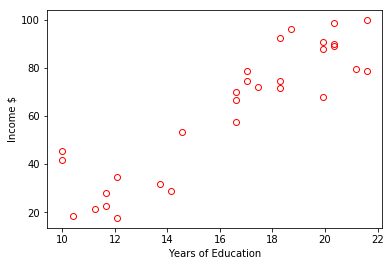

In [76]:
import matplotlib.pyplot as plt

plt.plot(income.Education, income.Income, 'or', mfc='none');
plt.xlabel('Years of Education')
plt.ylabel('Income $')


Plotting only the line with the function equation

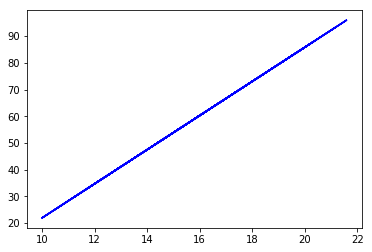

In [77]:
plt.plot(income.Education, lrsklearn.intercept_ + lrsklearn.coef_ * income.Education, '-b');

Adding the fitted line over the scatter plot

Text(0,0.5,'Income $')

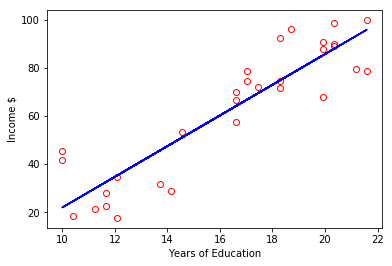

In [78]:
plt.plot(income.Education, income.Income, 'or', mfc='none');
plt.plot(income.Education, lrsklearn.intercept_ + lrsklearn.coef_ * income.Education, '-b');
plt.xlabel('Years of Education')
plt.ylabel('Income $')

5. Predicting Y=Income as a linear function of X1=Years of Education and X2=Seniority for a new individual with X1=18, X2=60
------------------

In [79]:
lrsklearn = LinearRegression()
lrsklearn.fit(X = income[ ['Education','Seniority'] ], y = income['Income'])
np_array = np.array([18,60])
out=lrsklearn.predict(np_array.reshape(1,2))

print('The predicted income for a person with 18 years of education and 60 years old is: $' + str(out))



The predicted income for a person with 18 years of education and 60 years old is: $[66.4056967]


6. Discussion: strongest predictor of Income
----------------

In the dataset used for assignment1 the predictor Education is stronger than Seniority for predicting the person's income because the t value (Student's t distibution) of Education is 16.513, bigger than 7.079 of Seniority. The bigger the t value, the better the predictor. 
Therefore, the figures in this experiment say that the more educated the person is, more likely he/she is to earn a better salary (Yearly income). 

In [80]:
linearReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           1.13e-16
Time:                        17:50:22   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""